In [13]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [14]:
df=pd.read_csv('Algerian_forest_fires_dataset_UPDATE.csv' ,header=1)
df.head()



,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [15]:
df.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
count,246,245,245,245,245,245,245,245,245,245,245,245,245,244
unique,33,5,2,20,63,19,40,174,167,199,107,175,128,9
top,01,07,2012,35,55,14,0,88.9,7.9,8,1.1,3,0.4,fire
freq,8,62,244,29,10,43,133,8,5,5,8,5,12,131


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.0+ KB


In [17]:
df[df.isnull().any(axis=1)]


,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


In [18]:
df=df.dropna().reset_index(drop=True)

In [19]:
df.shape

(244, 14)

In [20]:
df = df.drop(122).reset_index(drop=True)

In [21]:
df.loc[:122,'region'] = 0
df.loc[122:,'region'] = 1

In [22]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0.0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0.0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0.0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0.0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0.0


In [23]:
df['region'] = df['region'].astype(int)

In [24]:
df.columns = df.columns.str.strip()

In [25]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'region'],
      dtype='object')

In [26]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0


In [27]:
df = df.drop(['day','month','year'],axis=1)

In [28]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0
4,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0


In [29]:
df['Classes'].unique()

array(['not fire   ', 'fire   ', 'fire', 'fire ', 'not fire', 'not fire ',
       'not fire     ', 'not fire    '], dtype=object)

In [30]:
df['Classes'] = np.where(df['Classes'].str.contains('not fire'),0,1)

In [31]:
df['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Temperature  243 non-null    object
 1   RH           243 non-null    object
 2   Ws           243 non-null    object
 3   Rain         243 non-null    object
 4   FFMC         243 non-null    object
 5   DMC          243 non-null    object
 6   DC           243 non-null    object
 7   ISI          243 non-null    object
 8   BUI          243 non-null    object
 9   FWI          243 non-null    object
 10  Classes      243 non-null    int64 
 11  region       243 non-null    int64 
dtypes: int64(2), object(10)
memory usage: 22.9+ KB


In [33]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,0,0
4,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,0,0


In [34]:
df[['Temperature','RH','Rain','FFMC','DMC','DC','ISI',"BUI",'FWI']] = df[['Temperature','RH','Rain','FFMC','DMC','DC','ISI',"BUI",'FWI']].astype(float)

In [35]:
df['Ws'] = df['Ws'].astype(float)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  243 non-null    float64
 1   RH           243 non-null    float64
 2   Ws           243 non-null    float64
 3   Rain         243 non-null    float64
 4   FFMC         243 non-null    float64
 5   DMC          243 non-null    float64
 6   DC           243 non-null    float64
 7   ISI          243 non-null    float64
 8   BUI          243 non-null    float64
 9   FWI          243 non-null    float64
 10  Classes      243 non-null    int64  
 11  region       243 non-null    int64  
dtypes: float64(10), int64(2)
memory usage: 22.9 KB


In [37]:
df.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
Temperature,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,0.516015,0.269555
RH,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957,-0.432161,-0.402682
Ws,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368,-0.069964,-0.181160
Rain,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422,-0.379097,-0.040013
FFMC,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,0.769492,0.222241
DMC,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,0.585658,0.192089
DC,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,0.511123,-0.078734
ISI,0.603871,-0.686667,0.008532,-0.347484,0.740007,0.680454,0.508643,1.000000,0.644093,0.922895,0.735197,0.263197
BUI,0.459789,-0.353841,0.031438,-0.299852,0.592011,0.982248,0.941988,0.644093,1.000000,0.857973,0.586639,0.089408
FWI,0.566670,-0.580957,0.032368,-0.324422,0.691132,0.875864,0.739521,0.922895,0.857973,1.000000,0.719216,0.197102


<Axes: >

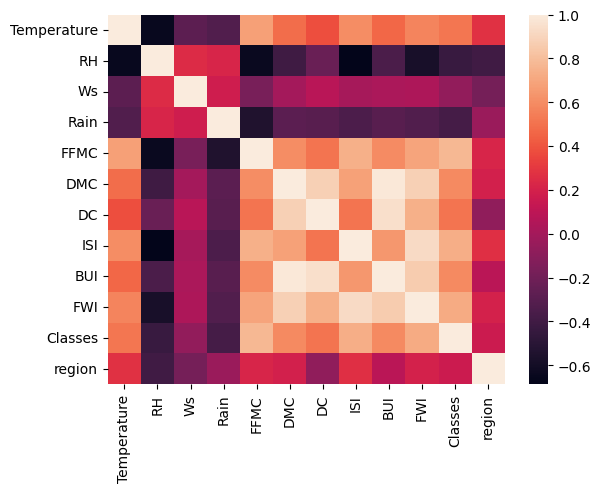

In [38]:
plt.Figure(figsize=(19,12))
sns.heatmap(df.corr())

In [39]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,29.0,57.0,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29.0,61.0,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26.0,82.0,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25.0,89.0,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27.0,77.0,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [40]:
X = df.drop('FWI', axis=1)
y = df['FWI']

In [41]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [42]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [43]:
from sklearn.linear_model import ElasticNetCV,LinearRegression,Ridge,Lasso
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
models = {
    'LinearRegression':LinearRegression(),
    'Ridge':Ridge(),
    'Lasso':Lasso(),
    'ElasticNetCV' : ElasticNetCV(),
    'SVR':SVR(),
    'KNeighborsRegressor':KNeighborsRegressor(),
    'DecisionTreeRegressor':DecisionTreeRegressor(),
    'RandomForestRegressor':RandomForestRegressor(),
    'AdaBoostRegressor':AdaBoostRegressor(),
    'GradientBoostingRegressor':GradientBoostingRegressor()
    
}
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train,y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    print("Training data for:",list(models.keys())[i])
    print('r2_score : ',r2_score(y_train,y_pred_train))
    print('mean_absolute_error : ',mean_absolute_error(y_train,y_pred_train))
    print('mean_squared_error : ',mean_squared_error(y_train,y_pred_train))
    print('-'*39)
    print("testing data for:",list(models.keys())[i])
    print('r2_score : ',r2_score(y_test,y_pred_test))
    print('mean_absolute_error : ',mean_absolute_error(y_test,y_pred_test))
    print('mean_squared_error : ',mean_squared_error(y_test,y_pred_test))
    print('='*39)
    
    
    




Training data for: LinearRegression
r2_score :  0.9737558301667233
mean_absolute_error :  0.6764092608548995
mean_squared_error :  1.5922515862521087
---------------------------------------
testing data for: LinearRegression
r2_score :  0.9890356825759857
mean_absolute_error :  0.4267520614689853
mean_squared_error :  0.33231115384863824
Training data for: Ridge
r2_score :  0.9736662588815013
mean_absolute_error :  0.6870620214740167
mean_squared_error :  1.5976859368863
---------------------------------------
testing data for: Ridge
r2_score :  0.9845121782477887
mean_absolute_error :  0.46348598120275497
mean_squared_error :  0.4694114296442019
Training data for: Lasso
r2_score :  0.9493233613044427
mean_absolute_error :  1.2482158555060352
mean_squared_error :  3.074586045644843
---------------------------------------
testing data for: Lasso
r2_score :  0.9527917018651335
mean_absolute_error :  0.9552746314709515
mean_squared_error :  1.4308089977464673
Training data for: ElasticNet

In [44]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,29.0,57.0,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29.0,61.0,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26.0,82.0,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25.0,89.0,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27.0,77.0,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [45]:
model_f = LinearRegression()
model_f.fit(X_train,y_train)
pred = model_f.predict(X_test)
r2_score(y_test,pred)

0.9890356825759857

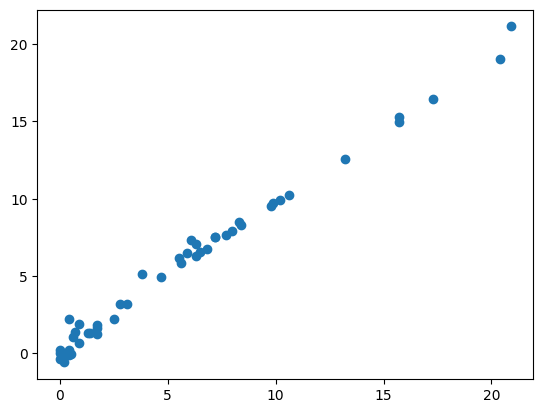

In [46]:
plt.scatter(y_test,pred)